## Neural Network
With our preprocessed wine data we will train an `MLPClassifier` model to predict the class based on the 5 attributes
We will need to tune the `hidden_layer_sizes` hyper parameter to create the best model

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

wine = pd.read_csv("preprocessed_wine.csv").dropna()

# The kitchen sink minus the class
X = wine.iloc[:,1:]

# Class
y = wine.iloc[:,0]

## Tuning
- We first need to scale the data we have, so we use the `StandardScaler` on our wine data for the model
- We then split our data into a training and a testing set
- Then we test 20 different hidden layer values to see which one results in the best model using `GridSearchCV`
- We will also figure out what the best `learning_rate` would be for the model using `GridSearchCV`

In [64]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=20250430)

model = MLPClassifier(solver="lbfgs", alpha=1e-5, hidden_layer_sizes=(), random_state=20250324);

param = {
    "hidden_layer_sizes": range(1,20),
    "learning_rate": ['constant', 'adaptive']
}

gs_tree = GridSearchCV(
    model,
    param_grid=param,
    scoring="accuracy",
    cv=5
)

gs_tree.fit(X_train,y_train)

display(gs_tree.best_params_)

{'hidden_layer_sizes': 8, 'learning_rate': 'constant'}

## Record how general error changes with hidden layers
We will test the same range of `hidden_layer_sizes` values and record how they affect training and testing accuracy

In [65]:
layer_sizes_values = range(1,20)

# Use this to store our results
scores = np.ones((len(layer_sizes_values), 5))
train_scores = np.ones(len(layer_sizes_values))
test_scores = np.ones(len(layer_sizes_values))


for (i,max_depth_candidate) in enumerate(layer_sizes_values):
    model = MLPClassifier(solver="lbfgs", alpha=1e-5, hidden_layer_sizes=(max_depth_candidate), random_state=20250324);
    current_score = cross_val_score(model, X_train, y_train, cv=5);
    scores[i] = current_score;
    model.fit(X_train,y_train)
    train_scores[i] = model.score(X_train,y_train)
    test_scores[i] = model.score(X_test,y_test)
print(scores)


[[0.79310345 0.68965517 0.78571429 0.60714286 0.71428571]
 [1.         0.82758621 0.96428571 0.92857143 0.92857143]
 [1.         0.82758621 1.         0.92857143 0.96428571]
 [1.         0.86206897 0.96428571 0.92857143 0.92857143]
 [1.         0.82758621 0.96428571 0.92857143 0.96428571]
 [1.         0.86206897 1.         0.92857143 0.96428571]
 [1.         0.82758621 0.92857143 0.89285714 1.        ]
 [1.         0.96551724 1.         0.92857143 0.96428571]
 [1.         0.96551724 1.         0.92857143 0.96428571]
 [1.         0.93103448 1.         0.92857143 0.96428571]
 [1.         0.93103448 1.         0.92857143 0.96428571]
 [1.         0.96551724 1.         0.92857143 0.96428571]
 [1.         0.86206897 0.89285714 0.92857143 0.96428571]
 [1.         0.89655172 1.         0.92857143 0.92857143]
 [1.         0.86206897 0.96428571 0.92857143 0.96428571]
 [1.         0.96551724 0.96428571 0.92857143 0.96428571]
 [1.         0.89655172 1.         0.92857143 0.89285714]
 [1.         0

## Plot results

### General Error
We recorded how the hidden layers affected the training and testing accuracy of the model

This result can also be plotted to help see if the model might have gotten overfit and would have poor generalization error


array([0.76760563, 0.98591549, 0.98591549, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

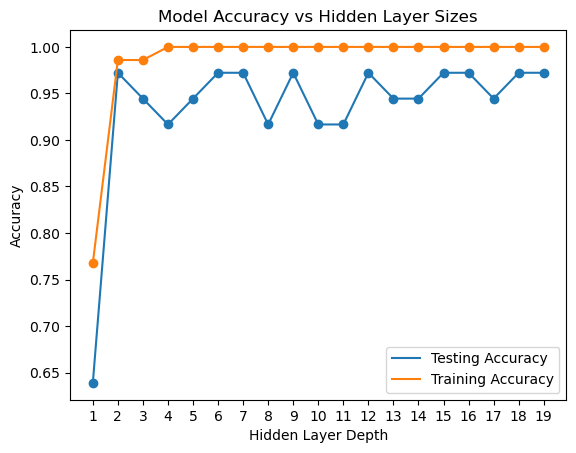

In [95]:
plt.plot(layer_sizes_values,test_scores, label="Testing Accuracy")
plt.plot(layer_sizes_values,train_scores, label="Training Accuracy")
plt.scatter(layer_sizes_values,test_scores)
plt.scatter(layer_sizes_values,train_scores)
plt.ylabel("Accuracy")
plt.xlabel("Hidden Layer Depth")
plt.xticks(layer_sizes_values)
plt.title("Model Accuracy vs Hidden Layer Sizes")
plt.legend();
display(train_scores)

## Parameter selection
From `GridSearchCV` it determined that the best value for `hidden_layer_sizes` is `8`. 
Therefore we will create a model with the hyperparameter `hidden_layer_sizes=8`

We also saw that the best `learning_rate` was `constant` so we will make the model with that hyperparameter as well

In [73]:
final_model = MLPClassifier(solver="lbfgs", alpha=1e-5,hidden_layer_sizes=())

final_model.set_params(hidden_layer_sizes=8,learning_rate='constant')

MLPClassifier(alpha=1e-05, hidden_layer_sizes=8, solver='lbfgs')

## Training and Testing
Now that the model has been selected, we must train and test the model on the data and see how it performs

In [77]:
final_model.fit(X_train,y_train)

acc = final_model.score(X_test,y_test)

print(f"Final testing accuracy is {acc * 100 :0.2f}%")

Final testing accuracy is 97.22%


## Confusion Matrix
Now that we have the model trained, we will plot a confusion matrix to see how the model well the model was able to classify

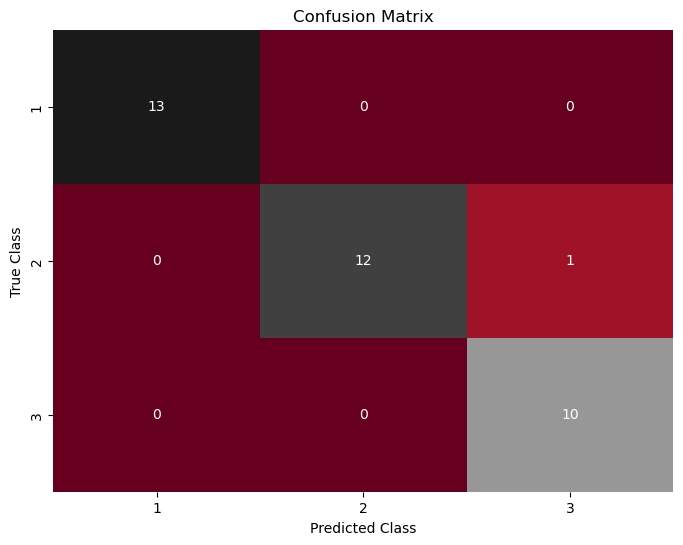

In [94]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred = final_model.predict(X_test)

# Compute the matrix
mat = confusion_matrix(y_test,y_pred)

# Plot the matrix
plt.figure(figsize=(8,6))
sns.heatmap(mat, annot=True, cmap="RdGy", xticklabels=final_model.classes_, yticklabels=final_model.classes_, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


## Conclusion
As our model was able to achieve a final testing accuracy of 97.22% it can be concluded that there is a strong correlation between the chemical properties of a sample of wine and the cultivar used in its creation.